### Set of methods to perform Time Series forecasting (with Python codes)


#### Table of Contents
 - Understanding the Problem Statement and Dataset
 - Installing library (statsmodels)
 - Method 1 – Start with a Naive Approach
 - Method 2 – Simple average
 - Method 3 – Moving average
 - Method 4 – Single Exponential smoothing
 - Method 5 – Holt’s linear trend method
 - Method 6 – Holt’s Winter seasonal method
 - Method 7 – ARIMA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib

Using matplotlib backend: Qt5Agg


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
## Importing data
df = pd.read_csv('JetRail/train.csv')

In [4]:
df.shape
df.head()
df.tail()

(18288, 3)

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


,ID,Datetime,Count
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580
18287,18287,25-09-2014 23:00,534


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.index

RangeIndex(start=0, stop=18288, step=1)

In [7]:
df.Datetime = pd.to_datetime(df.Datetime, format='%d-%m-%Y %H:%M')

In [8]:
df.index

RangeIndex(start=0, stop=18288, step=1)

In [9]:
## Set index to Datetime
ts = df.set_index('Datetime')

In [10]:
ts.index

DatetimeIndex(['2012-08-25 00:00:00', '2012-08-25 01:00:00',
               '2012-08-25 02:00:00', '2012-08-25 03:00:00',
               '2012-08-25 04:00:00', '2012-08-25 05:00:00',
               '2012-08-25 06:00:00', '2012-08-25 07:00:00',
               '2012-08-25 08:00:00', '2012-08-25 09:00:00',
               ...
               '2014-09-25 14:00:00', '2014-09-25 15:00:00',
               '2014-09-25 16:00:00', '2014-09-25 17:00:00',
               '2014-09-25 18:00:00', '2014-09-25 19:00:00',
               '2014-09-25 20:00:00', '2014-09-25 21:00:00',
               '2014-09-25 22:00:00', '2014-09-25 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=18288, freq=None)

In [11]:
ts.head()

,ID,Count
Datetime,,
2012-08-25 00:00:00,0,8
2012-08-25 01:00:00,1,2
2012-08-25 02:00:00,2,6
2012-08-25 03:00:00,3,2
2012-08-25 04:00:00,4,2


In [12]:
## Creating the subsetting the dataset from Augest 2012- Dec2013
train = ts['2012-08-01':'2013-10-31']
test = ts['2013-11-01':'2013-12-31']

In [13]:
train.shape
test.shape

(10392, 2)

(1464, 2)

In [14]:
# Aggregating the dataset at daily level
df_d = ts.resample('D').mean()
train_d = train.resample('D').mean()
test_d = test.resample('D').mean()
df_d.head()
train_d.head()
test_d.head()

,ID,Count
Datetime,,
2012-08-25,11.5,3.166667
2012-08-26,35.5,3.666667
2012-08-27,59.5,2.583333
2012-08-28,83.5,2.416667
2012-08-29,107.5,2.500000


,ID,Count
Datetime,,
2012-08-25,11.5,3.166667
2012-08-26,35.5,3.666667
2012-08-27,59.5,2.583333
2012-08-28,83.5,2.416667
2012-08-29,107.5,2.500000


,ID,Count
Datetime,,
2013-11-01,10403.5,161.583333
2013-11-02,10427.5,103.083333
2013-11-03,10451.5,76.833333
2013-11-04,10475.5,156.416667
2013-11-05,10499.5,169.750000


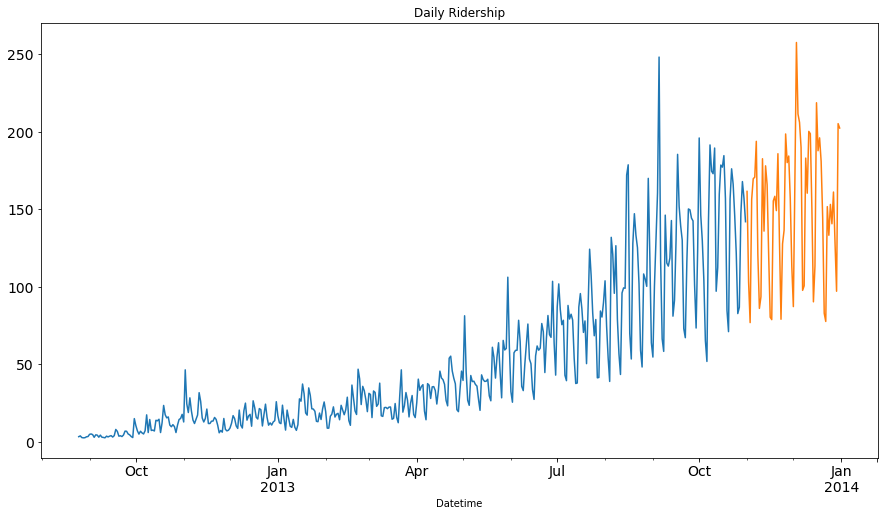

In [15]:
## Ploting the data
train_d.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize= 14)
test_d.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize= 14)

<Figure size 1080x576 with 0 Axes>

Text(0.5,1,'Daily Ridership')

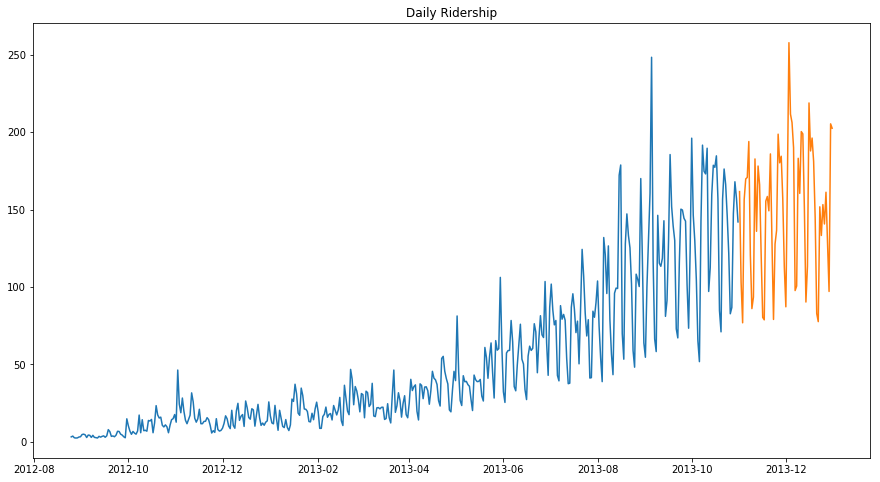

In [16]:
plt.figure(figsize=(15,8))
plt.plot(train_d.Count)
plt.plot(test_d.Count)
plt.title('Daily Ridership')

In [17]:
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

In [18]:
## Function for Testing the stationary

def test_stationarity(timeseries):
    # Determing the Rolling statistics
    
    rolmean = timeseries.rolling(12).mean()
    # pd.core.window.rolling(timeseries, windows = 12).mean()
    rolstd = timeseries.rolling(12).std()
    #pd.core.window.rolling(timeseries, windows = 12).std()
    
    ## Plot Rolling statistics:
    plt.figure(figsize=(15,8))
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red',  label = 'Rolling Mean')
    std = plt.plot(rolstd, color= 'black', label = 'Rolling Std')
    

    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Stanrd Deviation')
    plt.show(block = False)
    
    
    ## Perform Agumented Dickey-Fuller Test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observation Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value %Keys)'] = value
    
    print(dfoutput)

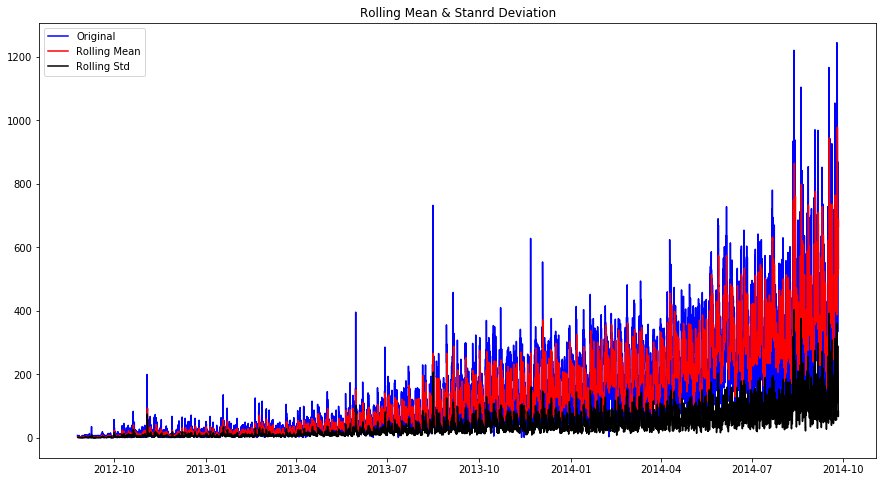

Results of Dickey-Fuller Test:
Test Statistic                   -4.456561
p-value                           0.000235
#Lags Used                       45.000000
Number of Observation Used    18242.000000
Critical Value %Keys)            -2.566854
dtype: float64


In [19]:
test_stationarity(ts.Count)

In [20]:
from statsmodels.tsa.api import ExponentialSmoothing

### Method 1: Start with a Naive Approach

In [21]:
dd = np.asarray(train_d.Count)
y_hat = test_d.copy()
## Copy the 493 row value of train_d to next all vlaue
y_hat['navie'] = dd[len(dd)-1]

In [22]:
len(dd)
dd[len(dd)-1]
len(y_hat)

433

142.0

61

<Figure size 864x576 with 0 Axes>

Text(0.5,1,'Naive Forecast')

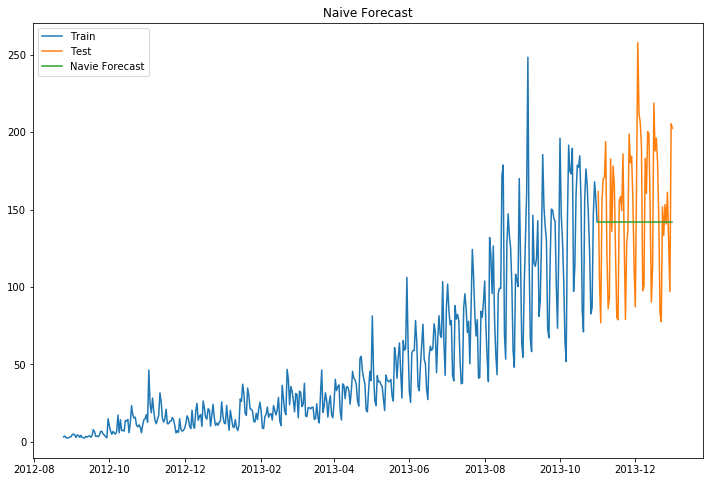

In [23]:
plt.figure(figsize=(12,8))
plt.plot(train_d.index, train_d.Count, label = 'Train')
plt.plot(test_d.index, test_d.Count, label = 'Test')
plt.plot(y_hat.index, y_hat.navie, label = 'Navie Forecast')
plt.legend(loc = 'best')
plt.title('Naive Forecast')

In [24]:
## Calculate the RMSE for this
from sklearn.metrics import mean_squared_error
from math import sqrt

In [25]:
rms = sqrt(mean_squared_error(y_hat.Count, y_hat.navie))
rms

43.91640614391676

## 2.Method: Simple Average

In [26]:
dd.mean()

48.333718244803705

<Figure size 1080x576 with 0 Axes>

Text(0.5,1,'Simple Average Forecast')

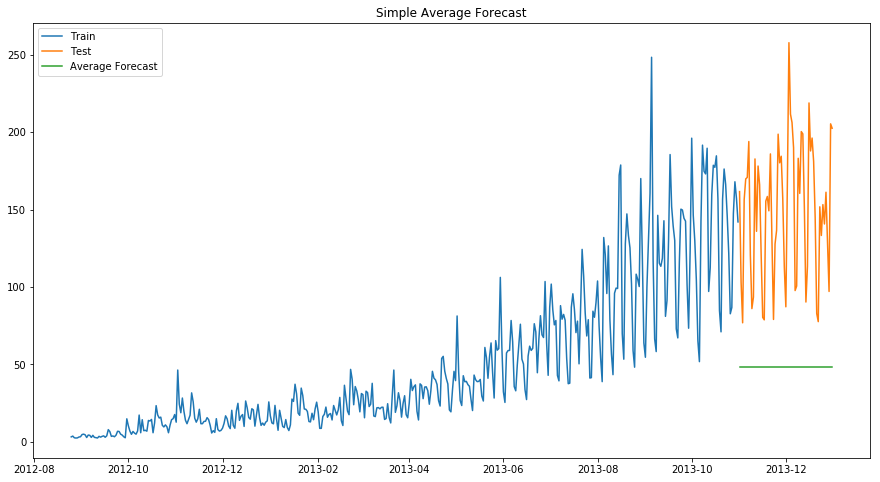

In [27]:
y_avg = test_d.copy()
y_avg['avg'] = dd.mean()

plt.figure(figsize=(15,8))
plt.plot(train_d.index,train_d.Count, label = 'Train')
plt.plot(test_d.index , test_d.Count, label = 'Test')
plt.plot(y_avg.avg, label = 'Average Forecast')
plt.legend(loc = 'best')
plt.title('Simple Average Forecast')

In [28]:
rms_avg = sqrt(mean_squared_error(y_avg.Count, y_avg.avg))
rms_avg

109.88526527082863

## 3. Moving Average

In [29]:
y_mavg = test_d.copy()

In [30]:
train_d.Count.rolling(60).mean().iloc[-1]


131.76111111111112

In [31]:
y_mavg['moving_avg'] = train_d.Count.rolling(60).mean().iloc[-1]

<Figure size 1080x576 with 0 Axes>

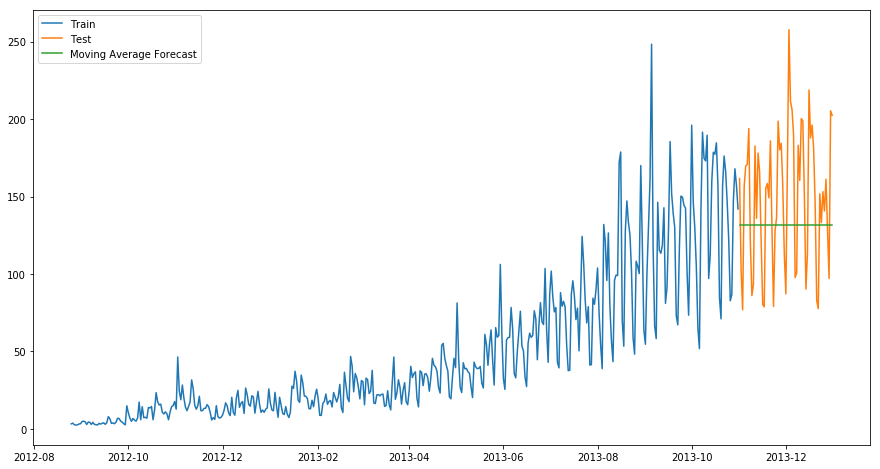

In [32]:
plt.figure(figsize=(15,8))
plt.plot(train_d.Count, label = 'Train')
plt.plot(test_d.Count, label = 'Test')
plt.plot(y_mavg.moving_avg, label= 'Moving Average Forecast')
plt.legend(loc = 'best')

In [33]:
rms_mavg = sqrt(mean_squared_error(y_mavg.Count, y_mavg.moving_avg))
rms_mavg

46.72840725106963

## 4. Simple Exponential smooting

**Exponetial Smoothing:** Attach larger weights to more recent observations than to observations from the distant past.


In [34]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [35]:
y_exp_avg = test_d.copy()

In [36]:
fit2 = SimpleExpSmoothing(np.asarray(train['Count'])).fit(smoothing_level = 0.6, optimized = False)
y_exp_avg['SES'] = fit2.forecast(len(test_d))

<Figure size 1152x576 with 0 Axes>

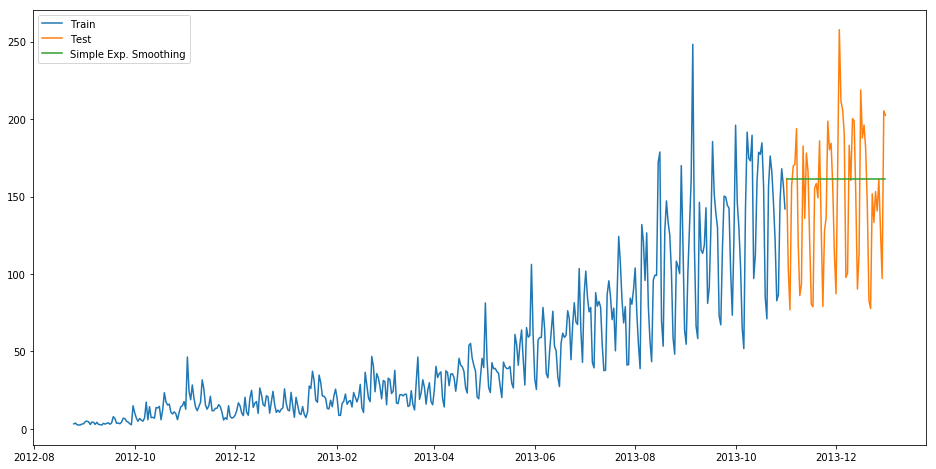

In [37]:
plt.figure(figsize=(16,8))
plt.plot(train_d.Count,label = 'Train')
plt.plot(test_d.Count, label = 'Test')
plt.plot(y_exp_avg['SES'], label = 'Simple Exp. Smoothing')
plt.legend(loc = 'best')

In [38]:
rms_ses = sqrt(mean_squared_error(y_exp_avg.Count, y_exp_avg.SES))
rms_ses

44.91917741788812

## Method 5. Holt's linear Trend Method
Holt extended simple exponential smoothing to allow forecasting of data with a trend. It is nothing more than exponential smoothing applied to both level(the average value in the series) and trend.

Each Time series dataset can be decomposed into it’s componenets which are 
- Trend
- Seasonality
- and Residual

In [39]:
import statsmodels.api as sm

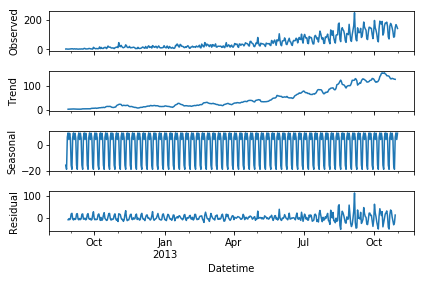

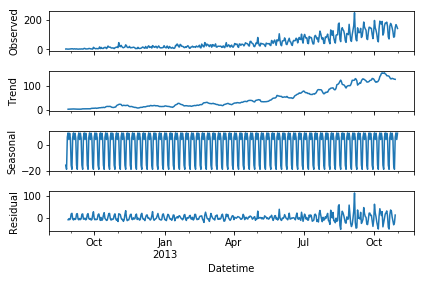

In [40]:
sm.tsa.seasonal_decompose(train_d.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)

In [41]:
result

(-6.051694700803371,
 1.2730602669709705e-07,
 38,
 10353,
 {'1%': -3.4309817900228796,
  '5%': -2.8618192146563457,
  '10%': -2.5669186208173786},
 90222.77888337223)

In [42]:
list(train_d)

['ID', 'Count']

In [43]:
y_hat_avg = test_d.copy()

fit1 = Holt(np.asarray(train_d['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test_d))

<Figure size 1152x576 with 0 Axes>

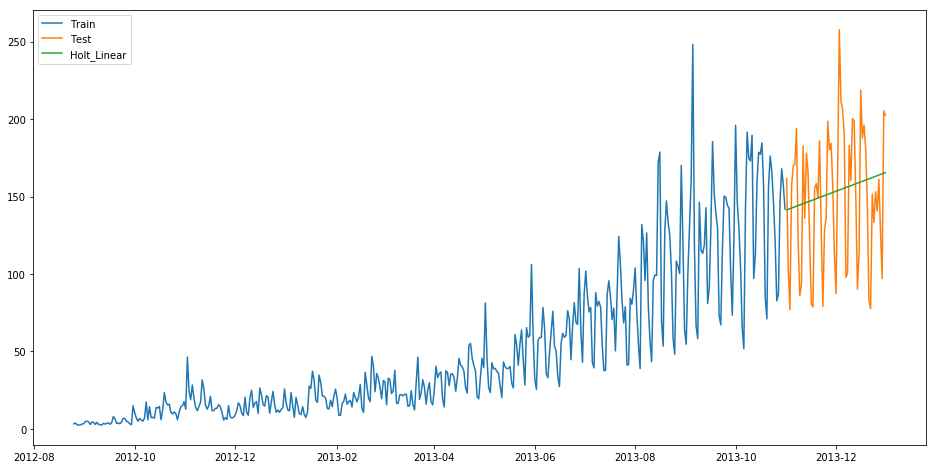

In [44]:
plt.figure(figsize=(16,8))
plt.plot(train_d['Count'], label = 'Train')
plt.plot(test_d['Count'], label = 'Test')
plt.plot(y_hat_avg.Holt_linear, label = 'Holt_Linear')
plt.legend(loc = 'best')


In [45]:
rms_holt_linear = sqrt(mean_squared_error(test_d.Count, y_hat_avg.Holt_linear))
rms_holt_linear

43.056259611507286

### Method 6: Holt-Winters Method

The **additive** method is preferred when the seasonal variations are roughly constant through the series,

while the **multiplicative** method is preferred when the seasonal variations are changing proportional to the level of the series.

When the trend increases or decreases linearly, **Additive equation** is used whereas when the trend increases of decreases exponentially, **multiplicative** equation is used.Practice shows that multiplicative is a more stable predictor, the additive method however is simpler to understand.

In [46]:
y_hat_win_avg = test_d.copy()

In [47]:
fit1 = ExponentialSmoothing(np.asarray(train_d.Count),seasonal_periods = 7, trend = 'add', seasonal = 'add').fit()
y_hat_win_avg['holt_winter'] = fit1.forecast(len(test_d))


<Figure size 1152x576 with 0 Axes>

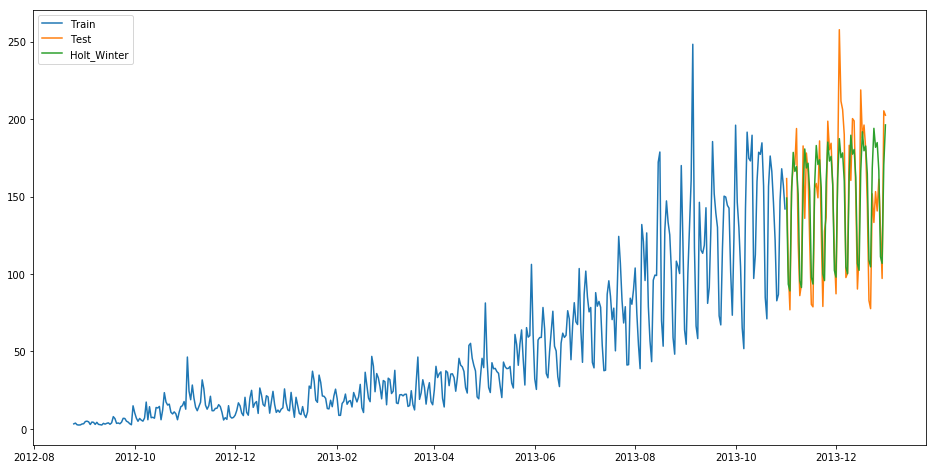

In [48]:
plt.figure(figsize=(16,8))
plt.plot(train_d['Count'], label = 'Train')
plt.plot(test_d['Count'], label = 'Test')
plt.plot(y_hat_win_avg.holt_winter, label = 'Holt_Winter')
plt.legend(loc = 'best')


In [49]:
rms_holt_winter = sqrt(mean_squared_error(test_d.Count, y_hat_win_avg.holt_winter))
rms_holt_winter

23.961492566159794

### Method 7: ARIMA
*** Seasonal ARIMA (SARIMA)***

In [50]:
y_sarima = test_d.copy()
fit1 = sm.tsa.statespace.SARIMAX(train_d.Count, order = (2, 1, 4), seasonal_order=(0, 1, 1, 7)).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [51]:
y_sarima['sarima'] = fit1.predict(start= '2013-11-1', end = '2013-12-31', dynamic=True)

<Figure size 1152x576 with 0 Axes>

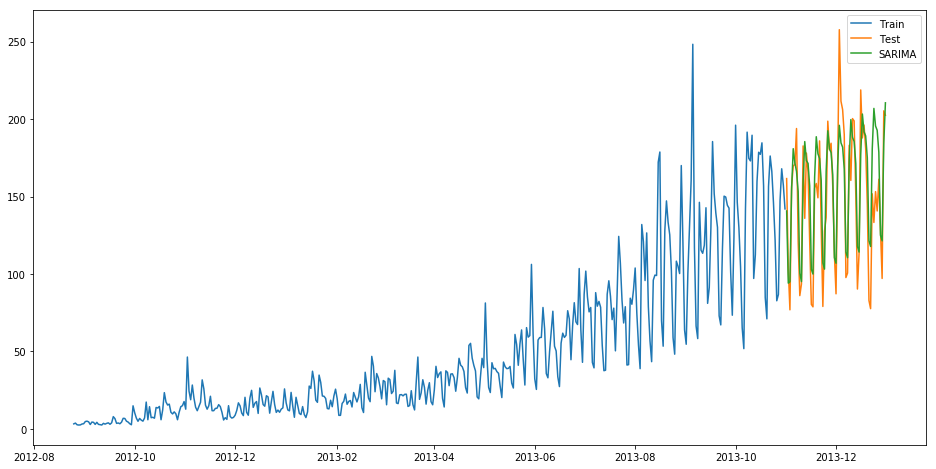

In [52]:
plt.figure(figsize=(16,8))
plt.plot(train_d['Count'], label = 'Train')
plt.plot(test_d['Count'], label = 'Test')
plt.plot(y_sarima.sarima, label = 'SARIMA')
plt.legend(loc = 'best')


In [53]:
rms_sarima = sqrt(mean_squared_error(test_d.Count, y_sarima.sarima))
rms_sarima

26.043862696311677